**Lecturer**

Set up MATLAB

In [1]:
cd matlab
pwd
clear all
format compact


ans =

    '/Users/eechris/dev/eglm03-textbook/content/03/5/matlab'



# Analytical Root-Locus Design of Phase-Lead Compensators

This MATLAB Live Script presents an analytical procedure for phase-lead design. It is based on Section 7.8 of Phillips and Harbor *Feedback Control Systems*, Prentice Hall, 1988<sup>[1]</sup>. For the procedure it is convenient to write the compensator transfer function as

$$\begin{equation}D(s)=\frac{a_1 s + a_0}{b_1s + 1}
\end{equation}$$                                                                    

In this procedure we choose $a_1$, $a_0$, and $b_1$ such that given $s_1$, 
the equation

$$\begin{equation}\left.KD(s)G(s)H(s)\right|_{s=s_1}=-1\end{equation}$$                                                   
is satisfied; that is we are designing a compensator that places a root 
of the closed-loop characteristic equation at $s=s_1$.

In equation (2) we have four unknowns, including $K$, and only two relationships 
(magnitude and phase) that must be satisfied. Hence, we can arbitrarily assign 
values to two of the unknowns. $K$ is easily eliminated since

$$KD(s)=\frac{K a_1 s + Ka_0}{b_1 + 1}$$                                                       

so if we assume that $K=1$ for the design procedure we eliminate one of 
the unknowns. The other unknown that can be eliminated is $a_0$ which can be 
seen to be the DC gain of the compensator. Its value can therefore be chosen 
to satisfy the steady-state error requirements of the design and we need only 
to determine values for $a_1$ and $b_1$.

The design proceeds as follows. First, we express the desired closed loop 
pole position

$$\begin{equation}s_1=|s_1|e^{j\beta}\end{equation}$$                                                                

and

$$\begin{equation}G(s_1)H(s_1) = \left| G(s_1)H(s_1) \right| e^{j\psi }\end{equation}$$                               

Then the design equations (derived in Appendix B of Phillips and Harbor, 
1988) are

$$\begin{eqnarray}
{a_1} &=& \frac{\sin \beta  + {a_0}\left| G(s_1)H(s_1) \right|\sin 
(\beta  - \psi )}{  \left| s_1 \right|\left| G(s_1)H(s_1)\right|\sin 
\psi}\\
{b_1} &=& \frac{\sin (\beta  - \psi ) + a_0\left| G(s_1)H(s_1) 
\right|\sin \psi }{ - \left| s_1 \right|\sin \psi  }
\end{eqnarray}$$                                     

Given $a_0$, $G(s)H(s)$, and the desired closed-loop pole location $s_1$, 
(5) and (6) give the remaining compensator coefficients. This procedure places a closed-loop 
pole at $s=s_1$; however, the locations of the remaining poles are unknown and 
may be unsatisfactory. In fact, some may be unstable!

For the case that $\psi$is either $0^\circ$ or $180^\circ$, equations (5) 
must be modified to give the single equation

$$\begin{equation}a_1|s_1|\cos\beta \pm \frac{b_1|s_1|}{|G(s_1)H(s_1)|} \pm \frac{1}{|G(s_1)H(s_1)|}+a_0=0\end{equation}$$                

where the plus sign applies to the case $\psi = 0^\circ$ and the minus 
sign applies to $\psi=180^\circ$. For this case, the value of either $a_1$ or 
$b_1$ can also be assigned. An example is now given to illustrate the procedure.

## Example

An executable version of this document is available as a MATLAB Live Script [analrloc.mlx](matlab/analrloc.mlx). You can use it to design a Lead Compensator for other systems by downoading that script and changing the set-up parameters.

### Definitions (change these to change design)

The plant transfer function is :

In [3]:
G = tf(1,[1 0 0]);  

The feedback transfer function is  $H\left(s\right)=1$:

In [4]:
H = tf(1,1);

So $G(s)H(s)$ is:

In [5]:
GH=series(G,H)


GH =
 
   1
  ---
  s^2
 
Continuous-time transfer function.



The desired closed-loop poles are:

In [6]:
s1 = -2 + 2j;

Now the DC gain of this type 2 system will be:

$$\begin{eqnarray*}K_a &=& \left. s^2D(s)G(s)H(s) \right|_{s = 0}\\
&=& \left.  s^2\frac{a_1 s + a_0}{b_1 + 1} \times \frac{1}{s^2} \right|_{s = 0}\\
&=& a_0.\end{eqnarray*}$$                                        

For the purpose of illustration let us arbitrarily take a value of $a_0=8/3$:

In [13]:
a0 = 8/3;

### Calculations 

**(You shouldn't need to change these commands)**

Polar form of $s_1$

In [7]:
m_s1=abs(s1),  p_s1 = (angle(s1)*180/pi + 90) % degrees 

m_s1 =
    2.8284
p_s1 =
   225


Transfer function evaluated at $s_1=G(s_1)H(s_1)$in polar form:

In [8]:
[numGH,denGH] = tfdata(GH,'v');GHs1=polyval(numGH,s1)/polyval(denGH,s1)

GHs1 =
   0.0000 + 0.1250i


Magnitude:

In [9]:
mGHs1=abs(GHs1)

mGHs1 =
    0.1250


Phase:

In [10]:
pGHs1=angle(GHs1)*180/pi - 180 % degrees

pGHs1 =
   -90


Hence angles are:

In [11]:
beta = p_s1*pi/180
psi = pGHs1*pi/180  % radians

beta =
    3.9270
psi =
   -1.5708


From (5)

In [14]:
a1 = (sin(beta) + a0*mGHs1*sin(beta - psi))/(m_s1*mGHs1*sin(psi))  
b1 = (sin(beta + psi) + a0*mGHs1*sin(beta))/(-(m_s1)*sin(psi))  

a1 =
    2.6667
b1 =
    0.1667


Compensator is therefore given by

In [15]:
numD = [a1, a0], denD = [b1, 1]  

numD =
    2.6667    2.6667
denD =
    0.1667    1.0000


which in normal form:

$$D(s)=K_c\left(\frac{s+z_1}{s+p_1}\right)$$                                                        

has

In [16]:
Kc = a1/b1, z0 = a0/a1, p0 = 1/b1  

Kc =
   16.0000
z0 =
     1
p0 =
    6.0000


Now make a transfer function

In [17]:
D = tf(Kc*[1, z0],[1, p0])  


D =
 
  16 s + 16
  ---------
    s + 6
 
Continuous-time transfer function.



### Evaluation of Design
Open loop transfer function:

In [19]:
Go = series(D,GH)  


Go =
 
   16 s + 16
  -----------
  s^3 + 6 s^2
 
Continuous-time transfer function.



*Root locus:*

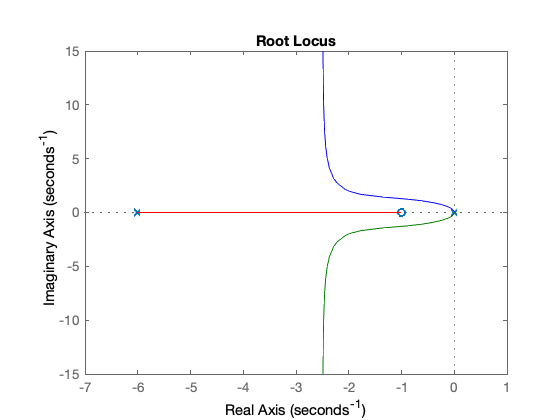

In [20]:
rlocus(Go) 

*Closed-loop transfer function:*

In [21]:
DG=series(D,G)  
Gc=feedback(DG,H)  


DG =
 
   16 s + 16
  -----------
  s^3 + 6 s^2
 
Continuous-time transfer function.


Gc =
 
         16 s + 16
  -----------------------
  s^3 + 6 s^2 + 16 s + 16
 
Continuous-time transfer function.



*Step response:*

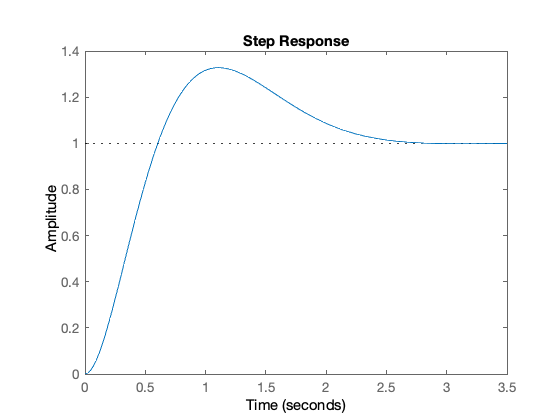

In [22]:
step(Gc)  

As an exercise, you should examine the effect of designing for a range 
of DC gains in the range $0\le K_a\le10$.


## Footnotes
[1] The proofs of the formulae given are derived in Appendix B of that text.